In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv("../datasets/final/INFY.csv")

In [3]:
df.shape

(102, 83)

In [4]:
df.drop(df.columns[0], axis=1, inplace=True)

In [5]:
df.set_index(df.columns[0], inplace=True)

In [6]:
# df = df.T

In [7]:
df

,4-Jun,4-Sep,4-Dec,5-Mar,5-Jun,5-Sep,5-Dec,6-Mar,6-Jun,6-Sep,...,22-Mar,22-Jun,22-Sep,22-Dec,23-Mar,23-Jun,23-Sep,23-Dec,24-Mar,24-Jun
4-Mar,,,,,,,,,,,,,,,,,,,,,
77.159378,86.314064,105.96875,130.731247,141.074997,147.390625,157.206253,187.303131,186.337494,192.434372,231.206253,...,1906.849976,1461.900024,1413.449951,1508.199951,1427.949951,1335.500,1435.449951,1542.900024,1498.050049,1566.750
33.320000,33.320000,33.32000,33.320000,135.290000,135.290000,135.290000,135.290000,138.000000,138.000000,138.000000,...,2103.000000,2103.000000,2103.000000,2103.000000,2074.000000,2074.000,2074.000000,2074.000000,2075.000000,2075.000
33.320000,33.320000,33.32000,33.320000,135.290000,135.290000,135.290000,135.290000,138.000000,138.000000,138.000000,...,2103.000000,2103.000000,2103.000000,2103.000000,2074.000000,2074.000,2074.000000,2074.000000,2075.000000,2075.000
3220.110000,3220.110000,3220.11000,3220.110000,5106.440000,5106.440000,5106.440000,5106.440000,6759.000000,6759.000000,6759.000000,...,66597.000000,66597.000000,66597.000000,66597.000000,64793.000000,64793.000,64793.000000,64793.000000,79101.000000,79101.000
3220.110000,3220.110000,3220.11000,3220.110000,5106.440000,5106.440000,5106.440000,5106.440000,6759.000000,6759.000000,6759.000000,...,66597.000000,66597.000000,66597.000000,66597.000000,64793.000000,64793.000,64793.000000,64793.000000,79101.000000,79101.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50.000000,65.000000,78.50000,93.000000,88.800000,79.000000,67.000000,80.000000,77.000000,104.000000,114.000000,...,1731.000000,2001.000000,2235.000000,2085.000000,2053.000000,2190.000,2272.000000,2324.000000,1934.000000,2360.000
337.050000,394.470000,454.85000,495.970000,513.900000,523.850000,592.000000,642.000000,664.000000,805.000000,896.000000,...,5177.000000,4901.000000,6253.000000,6210.000000,5904.000000,5956.000,6245.000000,6552.000000,8480.000000,5768.000
337.050000,394.470000,454.85000,495.970000,559.090000,523.850000,592.000000,642.000000,664.000000,805.000000,896.000000,...,5177.000000,4901.000000,6253.000000,6210.000000,5904.000000,5956.000,6245.000000,6552.000000,8480.000000,5768.000


In [8]:
closing_prices = df.iloc[0, 1:].values.astype(float)

scaler = MinMaxScaler(feature_range=(0, 1))
closing_prices_scaled = scaler.fit_transform(closing_prices.reshape(-1, 1))

In [9]:
def create_sequences(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i+look_back])
        y.append(data[i+look_back])
    return np.array(X), np.array(y)

look_back = 9
X, y = create_sequences(closing_prices_scaled, look_back)

In [10]:
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

In [11]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [12]:
model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50, return_sequences=False)))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
2/2 [==============================] - 12s 2s/step - loss: 0.0509 - val_loss: 0.3655
Epoch 2/50
2/2 [==============================] - 0s 61ms/step - loss: 0.0137 - val_loss: 0.1107
Epoch 3/50
2/2 [==============================] - 0s 56ms/step - loss: 0.0060 - val_loss: 0.0408
Epoch 4/50
2/2 [==============================] - 0s 57ms/step - loss: 0.0121 - val_loss: 0.0402
Epoch 5/50
2/2 [==============================] - 0s 56ms/step - loss: 0.0091 - val_loss: 0.0588
Epoch 6/50
2/2 [==============================] - 0s 61ms/step - loss: 0.0045 - val_loss: 0.0927
Epoch 7/50
2/2 [==============================] - 0s 57ms/step - loss: 0.0038 - val_loss: 0.1233
Epoch 8/50
2/2 [==============================] - 0s 58ms/step - loss: 0.0046 - val_loss: 0.1327
Epoch 9/50
2/2 [==============================] - 0s 60ms/step - loss: 0.0052 - val_loss: 0.1220
Epoch 10/50
2/2 [==============================] - 0s 56ms/step - loss: 0.0048 - val_loss: 0.0994
Epoch 11/50
2/2 [=============

In [14]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

1/1 [==============================] - 0s 32ms/step


In [15]:
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

In [16]:
y_train_scaled = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

In [17]:
full_closing_prices = scaler.inverse_transform(closing_prices_scaled)
all_predictions = np.concatenate([train_predictions, test_predictions], axis=0)

In [18]:
future_predictions = []
last_sequence = closing_prices_scaled[-look_back:]

In [19]:
num_future_predictions = 4
for _ in range(num_future_predictions):
    next_pred = model.predict(last_sequence.reshape(1, look_back, 1))
    future_predictions.append(next_pred[0, 0])
    last_sequence = np.append(last_sequence[1:], next_pred).reshape(look_back, 1)

1/1 [==============================] - 0s 31ms/step


In [20]:
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

In [21]:
extended_predictions = np.concatenate([all_predictions, future_predictions])

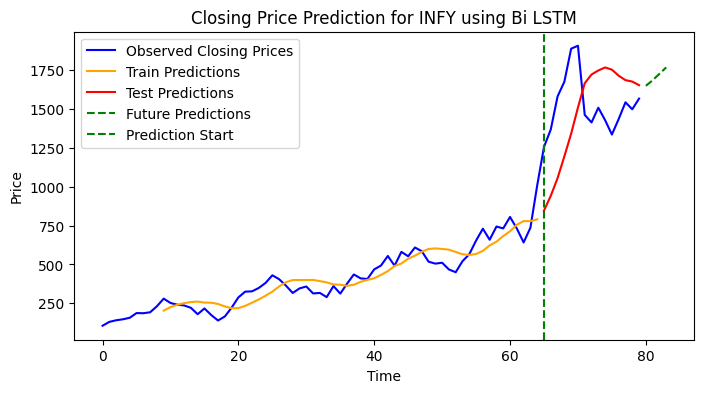

In [22]:
plt.figure(figsize=(8,4))
plt.plot(full_closing_prices, color='blue', label='Observed Closing Prices')
plt.plot(np.arange(look_back, look_back + len(train_predictions)), train_predictions, color='orange', label='Train Predictions')
plt.plot(np.arange(look_back + len(train_predictions), look_back + len(train_predictions) + len(test_predictions)), test_predictions, color='red', label='Test Predictions')
plt.plot(np.arange(len(full_closing_prices), len(full_closing_prices) + num_future_predictions), future_predictions, color='green', linestyle='--', label='Future Predictions')
plt.axvline(x=len(full_closing_prices) - len(test_predictions), color='green', linestyle='--', label='Prediction Start')
plt.title('Closing Price Prediction for INFY using Bi LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [23]:
print("Performance metrics:")
mae = mean_absolute_error(y_test_scaled, test_predictions)
mse = mean_squared_error(y_test_scaled, test_predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test_scaled - test_predictions) / y_test_scaled)) * 100

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

Performance metrics:
Mean Absolute Error (MAE): 331.9590740333333
Mean Squared Error (MSE): 128881.92944297094
Root Mean Squared Error (RMSE): 359.00129448648363
Mean Absolute Percentage Error (MAPE): 21.877648309760854%
